Importing all dependencies

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import re
import warnings
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

Loading Data

In [2]:
# Specify the full path to the CSV file
file_path = r'C:\Users\Edna\Documents\Notebook\Raw\Merged AA.csv'

# Load the reviews data from the specified path
df = pd.read_csv(file_path, encoding='ISO-8859-1')
df.head()

,Rating,Review_title,Review_comment
0,5.0,Exceptional,Very courteous and friendly service. Nice spa ...
1,5.0,My stay at the Haile Grand Addis was a truly m...,My stay at the Haile Grand Addis Hotel was not...
2,5.0,It was amazing! Great location and friendly st...,"Our stay at Haile Grand was more than a stay, ..."
3,5.0,"You, feel, welcomed, with great smiles. Their ...","Beautiful, very modern and still charming of o..."
4,5.0,"I had the best time, staying at this hotel, ev...","The hotel is beautiful, from decoration to lay..."


Data Cleaning and Preprocessing

In [3]:
#Checking for missing value
df.isna().sum()

Rating             0
Review_title       0
Review_comment    91
dtype: int64

Handling Missing Value

In [4]:
# Inspect rows with missing Review_comment
print(df[df['Review_comment'].isna()])

# Fill missing Review_comment values with Review_title
df['Review_comment'].fillna(df['Review_title'], inplace=True)


# Verify there are no missing Review_comment values
assert df['Review_comment'].isna().sum() == 0

# Check the DataFrame
df.head()

     Rating Review_title Review_comment
62      5.0  Exceptional            NaN
63      5.0  Exceptional            NaN
64      4.0    Very good            NaN
65      5.0          top            NaN
66      5.0  Exceptional            NaN
..      ...          ...            ...
169     5.0  Exceptional            NaN
170     5.0  Exceptional            NaN
171     3.0         Good            NaN
172     5.0  Exceptional            NaN
173     4.0    Very good            NaN

[91 rows x 3 columns]


,Rating,Review_title,Review_comment
0,5.0,Exceptional,Very courteous and friendly service. Nice spa ...
1,5.0,My stay at the Haile Grand Addis was a truly m...,My stay at the Haile Grand Addis Hotel was not...
2,5.0,It was amazing! Great location and friendly st...,"Our stay at Haile Grand was more than a stay, ..."
3,5.0,"You, feel, welcomed, with great smiles. Their ...","Beautiful, very modern and still charming of o..."
4,5.0,"I had the best time, staying at this hotel, ev...","The hotel is beautiful, from decoration to lay..."


In [5]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Customize stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words = set(stop_words)
print(stop_words)

{'which', 'ourselves', "she's", 'aren', 'that', "that'll", 'than', 'hers', 'don', 'it', 'an', 'ours', 'mustn', 'him', 'couldn', 'himself', 'some', "couldn't", "shouldn't", 'been', 'what', 'between', 'at', 'there', 'mightn', "mustn't", 'the', 'haven', "hasn't", 'so', 'only', "you'll", 'in', 'we', 'he', 'each', 'are', 'few', 'shan', "shan't", 'i', "hadn't", 'them', 'as', 'was', 'would', "it's", 'most', "wouldn't", 'am', 'yourself', "needn't", 'might', 'own', 'having', "don't", 'off', 'now', 'can', 'but', 'no', "wasn't", 'before', 'same', 'did', 'more', 'o', 'by', 'under', 'does', 'she', 'up', 'for', 'yours', 'shall', 'and', "won't", "you've", 'who', 'when', 'a', 't', 'after', 'whom', 'her', 'because', 'against', 'those', 'again', 'weren', 'such', 'has', 'of', 'other', 'ain', 'herself', 'to', 'until', 'above', 'had', 'while', 'have', 'theirs', 'won', 'were', 'too', 'you', 'over', 'below', 're', 'will', 'during', 'into', 'from', 'they', 'doing', 's', 'is', 'with', 'd', 'll', 'how', 'all', 

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Data cleaning and preprocessing pipeline

In [6]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Removing special characters
def remove_special_character(content):
    return re.sub('\W+', ' ', content)

# Removing URLs
def remove_url(content):
    return re.sub(r'http\S+|www\S+|https\S+', '', content)

# Removing stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of English contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "will not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

# Comprehensive data cleaning function
def data_cleaning(content):
    # Convert non-string entries to strings
    if not isinstance(content, str):
        content = str(content)
    
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    content = remove_stopwords(content)
    content = content.lower()
    tokens = content.split()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    cleaned_content = ' '.join(tokens)
    return cleaned_content
df.columns

Index(['Rating', 'Review_title', 'Review_comment'], dtype='object')

In [7]:
# Set display options
pd.options.display.max_colwidth = 1000

# Apply data cleaning to the 'Review_comment' column and save it back to the same column
df['Review_comment'] = df['Review_comment'].apply(data_cleaning)

# Display the results
print(df[['Review_comment']].head(5))


                                                                                                                                                                                                                                                                                                                                                             Review_comment
0                                                                                                                                                                                                                                                                                                          courteous friendly service nice spa facility delicious breakfast
1  stay haile grand addis hotel nothing short exceptional opulent decor impeccable service every aspect exuded luxury room offered great view including great view addis ababa night complemented indulgent amenity truly enhanced experience anyone seeking blend comfort sophi

Double-check for any other missing values

In [8]:
# Check for missing values in the entire DataFrame
print(df.isnull().sum())

#Fill missing 'Rating' with the mean rating
df['Rating'].fillna(df['Rating'].mean(), inplace=True)


Rating            0
Review_title      0
Review_comment    0
dtype: int64


In [9]:
df['Rating'].value_counts()

Rating
5.0    105
4.5     32
4.0     20
3.0      5
3.5      4
0.5      3
1.5      2
2.0      1
1.0      1
2.5      1
Name: count, dtype: int64

In [10]:
#Convert 'Rating' to integer if it's not already
df['Rating'] = df['Rating'].astype(int)

In [11]:
df['Rating'].value_counts()

Rating
5    105
4     52
3      9
0      3
1      3
2      2
Name: count, dtype: int64

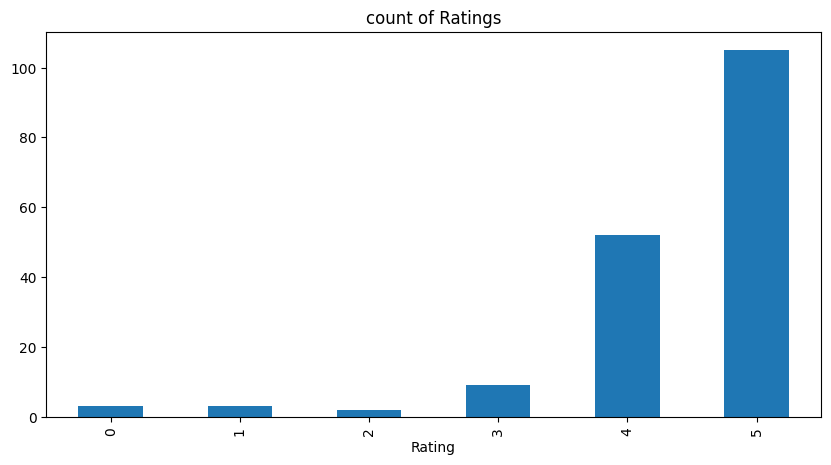

In [12]:
#plot count of Ratings
ax = df['Rating'].value_counts().sort_index().plot(kind = 'bar',title = 'count of Ratings',figsize = (10,5))
ax.set_xlabel('Rating')
plt.show()

In [13]:
print('Unique reviews:%s' % df.Review_comment.nunique())
print('No of ratings:%s'% df['Rating'].count())

Unique reviews:92
No of ratings:174


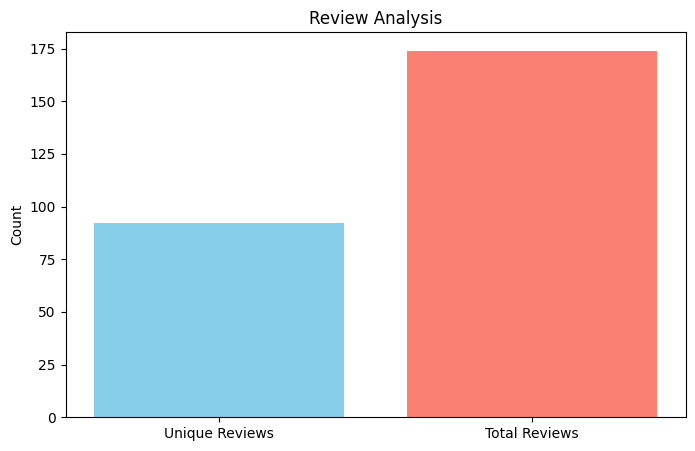

In [14]:
import matplotlib.pyplot as plt

unique_reviews = df['Review_comment'].nunique()
total_reviews = df['Review_comment'].count()

# Data for plotting
labels = ['Unique Reviews', 'Total Reviews']
values = [unique_reviews, total_reviews]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['skyblue', 'salmon'])
plt.title('Review Analysis')
plt.ylabel('Count')
plt.show()

Sentiment analysis with Vader pretrained model 

In [15]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis and get the compound score
df['Sentiment_score'] = df['Review_comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Function to categorize sentiment using both score and rating with adjusted thresholds
def categorize_with_rating(score, rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        if score > 0.7:  
            return 'Positive'
        elif score < -0.2:  
            return 'Negative'
        else:
            return 'Neutral'

# Apply the hybrid approach
df['Sentiment'] = df.apply(lambda row: categorize_with_rating(row['Sentiment_score'], row['Rating']), axis=1)

# Verify the new class distribution
print(df['Sentiment'].value_counts())

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Sentiment
Positive    157
Negative     10
Neutral       7
Name: count, dtype: int64


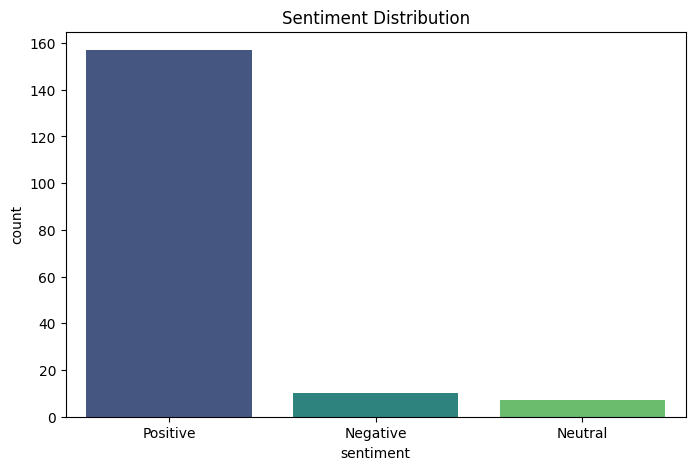

In [26]:
#Viisualize sentiment
import matplotlib.pyplot as plt
import seaborn as sns
sentiment_counts = df['Sentiment'].value_counts()
#plot
plt.figure(figsize=(8,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette ='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

Visualization with word cloud 

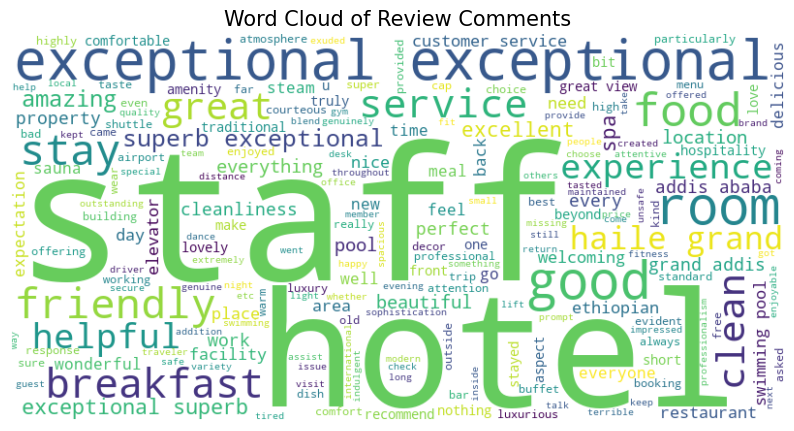

In [16]:
# Create a word cloud plot
def create_wordcloud(data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(data))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Generate and display the word cloud plot for review comments
create_wordcloud(df['Review_comment'], 'Word Cloud of Review Comments')

(np.float64(-0.5), np.float64(1499.5), np.float64(799.5), np.float64(-0.5))

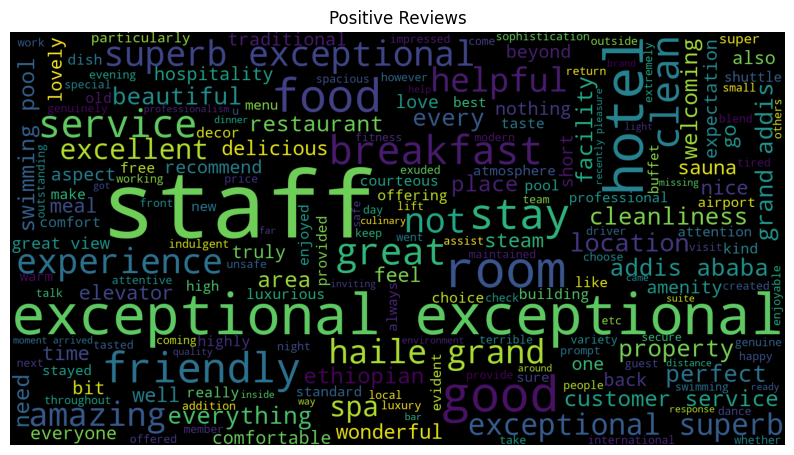

In [17]:
#word cloud for positive Reviews
sentences=df['Review_comment']
pos=' '.join(map(str,sentences[df['Rating']>=4]))
neg=' '.join(map(str,sentences[df['Rating']<=2]))
  
pos_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

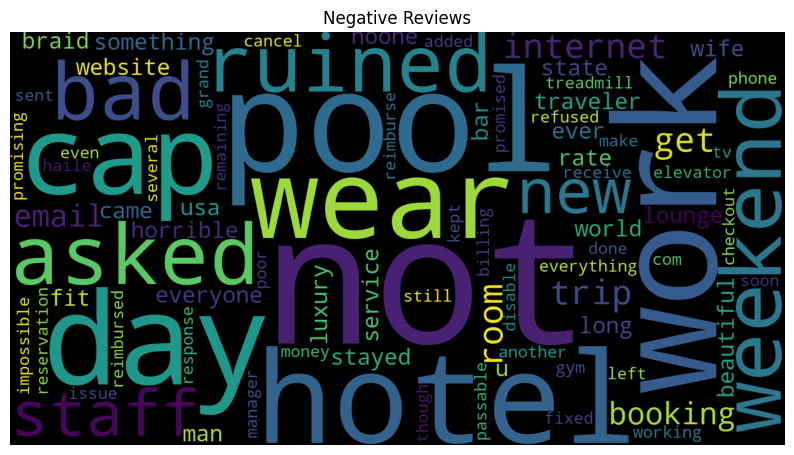

In [18]:
neg_wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

Visulaization of number of charactor in reviews

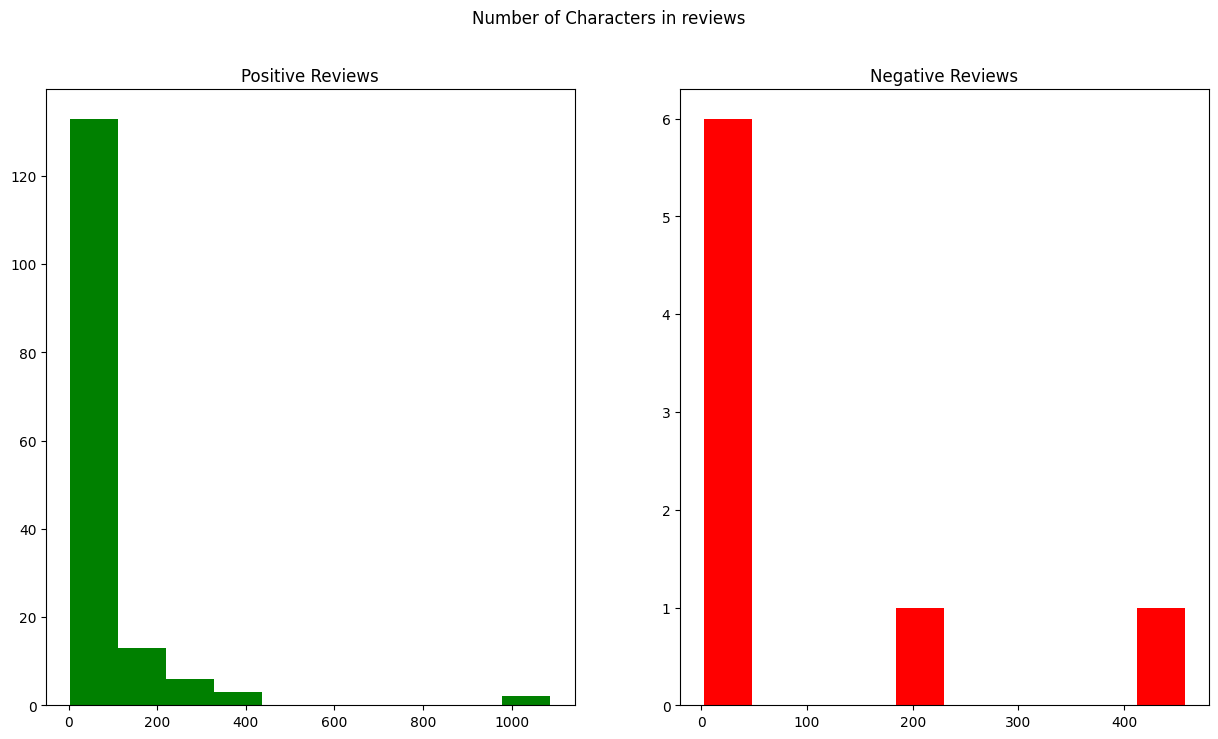

In [19]:
#Visulaization of number of charactor in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(15,8))
len_pos_review=df[df['Rating']>=4]['Review_comment'].str.len()
pos_ax.hist(len_pos_review,color='green')
pos_ax.set_title('Positive Reviews')
len_neg_review=df[df['Rating']<=2]['Review_comment'].str.len()
neg_ax.hist(len_neg_review,color='red')
neg_ax.set_title('Negative Reviews')
figure.suptitle('Number of Characters in reviews')
plt.show()

Frequency of words (unigram,bigram,trigrams) for Positive & negative Reviews

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

# Function to get top n-grams
def get_top_text_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Filter for negative reviews (reviews with rating >= 2)
positive_reviews = df[df['Rating'] >= 4]

# Extract unigrams, bigrams, and trigrams
unigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (1, 1)))
bigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (2, 2)))
trigrams = dict(get_top_text_ngrams(positive_reviews['Review_comment'], 20, (3, 3)))

# Convert to DataFrames for visualization
unigrams_df = pd.DataFrame(unigrams.items(), columns=["Common_Unigrams", "Count"])
bigrams_df = pd.DataFrame(bigrams.items(), columns=["Common_Bigrams", "Count"])
trigrams_df = pd.DataFrame(trigrams.items(), columns=["Common_Trigrams", "Count"])

# Plot Unigrams
fig1 = px.bar(unigrams_df, x="Count", y="Common_Unigrams", 
              title='Top 20 Unigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Unigrams')
fig1.show()

# Plot Bigrams
fig2 = px.bar(bigrams_df, x="Count", y="Common_Bigrams", 
              title='Top 20 Bigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Bigrams')
fig2.show()

# Plot Trigrams
fig3 = px.bar(trigrams_df, x="Count", y="Common_Trigrams", 
              title='Top 20 Trigrams in Positive Reviews',
              orientation='h', width=700, height=700, color='Common_Trigrams')
fig3.show()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'browser'

# Function to get top n-grams
def get_top_text_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


negative_reviews = df[df['Rating'] <= 2]

# Extract unigrams, bigrams, and trigrams
unigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (1, 1)))
bigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (2, 2)))
trigrams = dict(get_top_text_ngrams(negative_reviews['Review_comment'], 20, (3, 3)))

# Convert to DataFrames for visualization
unigrams_df = pd.DataFrame(unigrams.items(), columns=["Common_Unigrams", "Count"])
bigrams_df = pd.DataFrame(bigrams.items(), columns=["Common_Bigrams", "Count"])
trigrams_df = pd.DataFrame(trigrams.items(), columns=["Common_Trigrams", "Count"])

# Plot Unigrams
fig1 = px.bar(unigrams_df, x="Count", y="Common_Unigrams", 
              title='Top 20 Unigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Unigrams')
fig1.show()

# Plot Bigrams
fig2 = px.bar(bigrams_df, x="Count", y="Common_Bigrams", 
              title='Top 20 Bigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Bigrams')
fig2.show()

# Plot Trigrams
fig3 = px.bar(trigrams_df, x="Count", y="Common_Trigrams", 
              title='Top 20 Trigrams in Negative Reviews',
              orientation='h', width=700, height=700, color='Common_Trigrams')
fig3.show()

check for words in negative and positive Reviews

In [23]:
import pandas as pd

# Filter reviews based on rating and specific negative words
filtered_reviews = df[
    (df['Rating'] >= 4) & 
    (df['Review_comment'].str.contains("bad|dirty|unclean|broken", case=False, na=False))
]

# Display the results
filtered_reviews[["Rating", "Review_comment"]].value_counts().sum()
#filtered_reviews[["Rating", "Review_comment"]].head()

np.int64(1)

In [25]:
import pandas as pd

# Filter reviews based on rating and specific negative words
filtered_reviews = df[
    (df['Rating'] <= 2) & 
    (df['Review_comment'].str.contains("good|great|nice|amazing|best", case=False, na=False))
]
# Display the results
filtered_reviews[["Rating", "Review_comment"]].value_counts().sum()
#filtered_reviews[["Rating", "Review_comment"]].head()

np.int64(0)

Save the labeled dataset to a CSV file

In [28]:
df.to_csv(r'C:\Users\Edna\Documents\Data\Processed\Merged AA_sentiment_labeled_wordcloud.csv', index=False)